# Exploring Cellular Automata for Emergent Intelligence

In [3]:
# Cellular Automata for Emergent Intelligence
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the notebook for inline plotting
%matplotlib inline


# Creating a Basic CA Grid

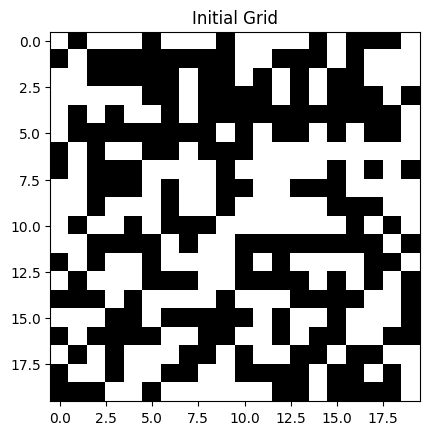

In [4]:
def initialize_grid(size, random_seed=None):
    """
    Initializes a grid with random binary states (0 or 1).
    """
    if random_seed:
        np.random.seed(random_seed)
    return np.random.choice([0, 1], size=(size, size))

# Example grid
grid_size = 20
grid = initialize_grid(grid_size, random_seed=42)

# Display the grid
plt.imshow(grid, cmap='binary')
plt.title("Initial Grid")
plt.show()


# Rule-Based Dynamics

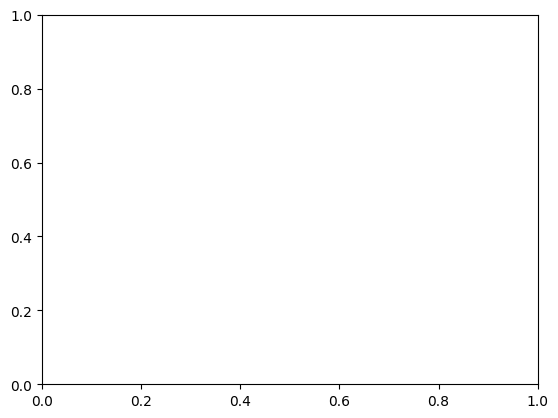

d:\books\cellular-automata-book\.env\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [5]:
def game_of_life_step(grid):
    """
    Updates the grid based on Conway's Game of Life rules.
    """
    new_grid = grid.copy()
    for i in range(1, grid.shape[0] - 1):
        for j in range(1, grid.shape[1] - 1):
            # Count neighbors
            neighbors = grid[i-1:i+2, j-1:j+2].sum() - grid[i, j]
            
            # Apply Conway's rules
            if grid[i, j] == 1 and (neighbors < 2 or neighbors > 3):
                new_grid[i, j] = 0  # Death
            elif grid[i, j] == 0 and neighbors == 3:
                new_grid[i, j] = 1  # Birth
    return new_grid

ani = None

# Visualize Evolution
def animate_life(grid, steps=10):
    grids = [grid]
    for _ in range(steps):
        grid = game_of_life_step(grid)
        grids.append(grid)
    
    fig, ax = plt.subplots()
    def update(frame):
        ax.clear()
        ax.imshow(grids[frame], cmap='binary')
        ax.set_title(f"Step {frame}")
    
    ani = FuncAnimation(fig, update, frames=steps + 1, repeat=False)
    plt.show()

# Initialize and animate
grid = initialize_grid(grid_size, random_seed=42)
animate_life(grid, steps=20)



Code: Implementing Langton’s Ant

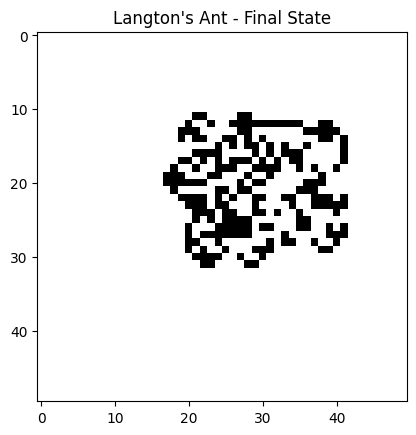

In [6]:
def langtons_ant(size, steps):
    grid = np.zeros((size, size))
    x, y = size // 2, size // 2  # Start in the center
    direction = 0  # 0: up, 1: right, 2: down, 3: left
    
    def turn_right(d): return (d + 1) % 4
    def turn_left(d): return (d - 1) % 4
    
    positions = []
    
    for _ in range(steps):
        positions.append((x, y))
        if grid[x, y] == 0:
            direction = turn_right(direction)
            grid[x, y] = 1
        else:
            direction = turn_left(direction)
            grid[x, y] = 0
        
        if direction == 0:
            x = (x - 1) % size
        elif direction == 1:
            y = (y + 1) % size
        elif direction == 2:
            x = (x + 1) % size
        elif direction == 3:
            y = (y - 1) % size
    
    return grid, positions

grid, positions = langtons_ant(size=50, steps=2000)

# Visualize the final state
plt.imshow(grid, cmap='binary')
plt.title("Langton's Ant - Final State")
plt.show()


Modeling Natural Processes

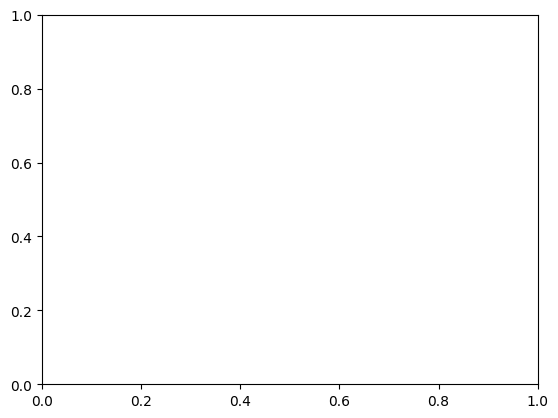

In [7]:
import numpy as np

def fire_spread_step(grid, p_catch):
    """
    Simulates one step of fire spread.
    """
    new_grid = grid.copy()
    for i in range(1, grid.shape[0] - 1):
        for j in range(1, grid.shape[1] - 1):
            if grid[i, j] == 1:  # Burning
                new_grid[i, j] = 0  # Burn out
                # Spread fire to neighbors
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    if grid[i+dx, j+dy] == 2 and np.random.rand() < p_catch:
                        new_grid[i+dx, j+dy] = 1
    return new_grid

# Initialize a grid with some burning trees
forest_size = 50
forest = np.full((forest_size, forest_size), 2)  # 2: Tree
forest[25, 25] = 1  # Start a fire

# Simulate fire spread
steps = 20
p_catch = 0.3
forests = [forest]
for _ in range(steps):
    forest = fire_spread_step(forest, p_catch)
    forests.append(forest)

# Visualize fire spread
def animate_fire(forests):
    fig, ax = plt.subplots()
    def update(frame):
        ax.clear()
        ax.imshow(forests[frame], cmap='hot', vmin=0, vmax=2)
        ax.set_title(f"Step {frame}")
    
    ani = FuncAnimation(fig, update, frames=len(forests), repeat=False)
    plt.show()

animate_fire(forests)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 0]]


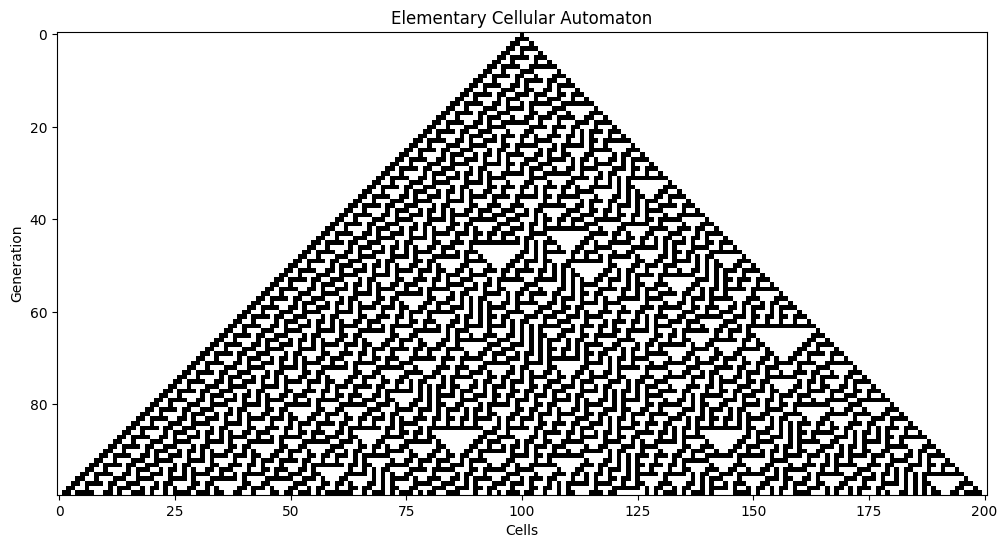

In [18]:
import numpy as np
import matplotlib.pyplot as plt 

def rule_binary(rule_number):
    """
    Converts a decimal rule number to a binary rule.
    """
    return np.array([int(x) for x in np.binary_repr(rule_number, width=8)])

def apply_rule(state, rule):
    """
    Applies a rule to a window of cells.
    """
    next_state = np.zeros_like(state)
    for i in range(1, state.shape[0] - 1):
        neighborhood = 4 * state[i-1] + 2 * state[i] + state[i+1]
        next_state[i] = rule[7 - neighborhood]

    return next_state

def generate_ca(initial_state, rule_number : int, generations: int):
    """
    Generates a 1D cellular automaton.
    """
    rule = rule_binary(rule_number)
    state = np.zeros((generations, len(initial_state)), dtype=np.int8)
    state[0] = initial_state
    for i in range(1, generations):
        state[i] = apply_rule(state[i - 1], rule)
    return state
         
def plot_eca(cells):
    """
    Plots a 1D cellular automaton.
    """
    plt.figure(figsize=(12, 8))
    plt.imshow(cells, cmap='binary', interpolation='nearest')
    plt.title("Elementary Cellular Automaton")
    plt.xlabel("Cells")
    plt.ylabel("Generation")
    plt.show()


rule_number = 30
num_generations = 100
initial_state = np.zeros(201)
initial_state[len(initial_state) // 2] = 1

cells = generate_ca(initial_state, 30, 100)
print(cells)
plot_eca(cells)





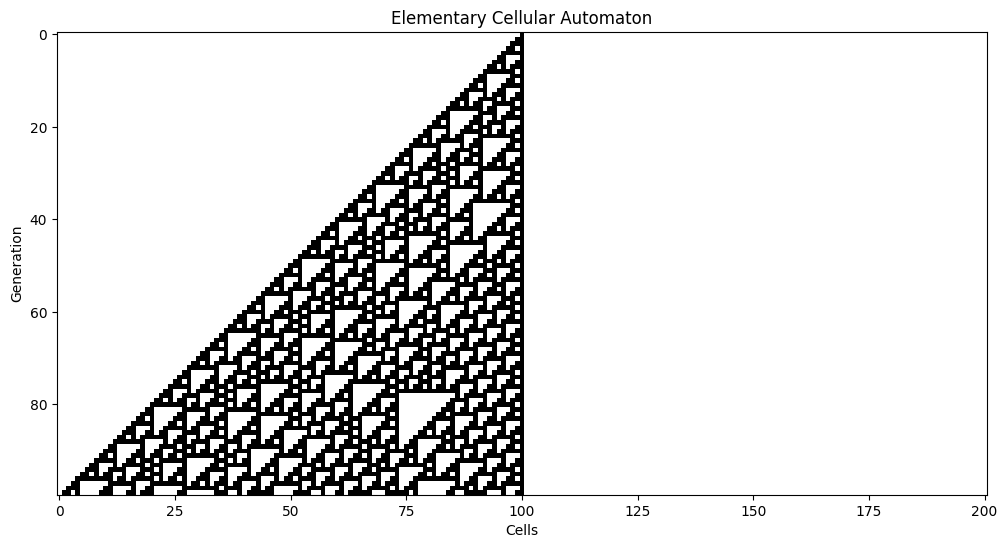

In [24]:
rule_number = 110
num_generations = 100
initial_state = np.zeros(201)
initial_state[len(initial_state) // 2] = 1

cells = generate_ca(initial_state, rule_number, num_generations)
plot_eca(cells)

In [26]:
def rule_table(rule_number):
    """
    Converts a decimal rule number to a rule table.
    """
    rule = rule_binary(rule_number)
    neighbours = ["111", "110", "101", "100", "011", "010", "001", "000"]
    print(f'Rule: {rule_number}')
    for i in range(8):
        print(f'{neighbours[i]} -> {rule[7 - i]}')  

rule_table(110)

Rule: 110
111 -> 0
110 -> 1
101 -> 1
100 -> 1
011 -> 0
010 -> 1
001 -> 1
000 -> 0


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import GPT2Model, GPT2Config

class CellularAutomataGPT2(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CellularAutomataGPT2, self).__init__()
        self.input_projection = nn.Linear(input_dim, hidden_dim)
        self.gpt2 = GPT2Model(GPT2Config(n_embd=hidden_dim))
        self.output_projection = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        x = self.input_projection(x)
        hidden_states = self.gpt2(inputs_embeds=x).last_hidden_state
        output = self.output_projection(hidden_states)
        return output

# Parameters
input_dim = 100  # Length of each generation (number of cells in the automaton)
hidden_dim = 240  # Dimension for model embedding
sequence_length = 60  # Number of steps to predict

# Initialize the model
model = CellularAutomataGPT2(input_dim, hidden_dim)
model.train()

# Optimizer and Loss Function
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.BCEWithLogitsLoss()

# Generate synthetic data for training (replace with real cellular automata data)
def generate_ca_data(rule, num_samples, sequence_length, input_dim):
    # This function should generate training sequences using the specified CA rule
    # For simplicity, we generate random binary sequences
    return torch.randint(0, 2, (num_samples, sequence_length, input_dim), dtype=torch.float)

num_samples = 1000
training_data = generate_ca_data(30, num_samples, sequence_length, input_dim)

# Training loop
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for sequence in training_data:
        optimizer.zero_grad()
        input_sequence = sequence[:-1]
        target_sequence = sequence[1:]

        # Forward pass
        output = model(input_sequence.unsqueeze(0))
        loss = criterion(output.squeeze(0), target_sequence)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(training_data)}")

# Save the trained model
torch.save(model.state_dict(), "ca_gpt2_model.pth")


Epoch 1, Loss: 0.6953647984862328
Epoch 2, Loss: 0.693810539662838
Epoch 3, Loss: 0.693659769654274
Epoch 4, Loss: 0.6935848855376243
Epoch 5, Loss: 0.6935447430610657
Epoch 6, Loss: 0.6934820747375489
Epoch 7, Loss: 0.693467671573162
Epoch 8, Loss: 0.693409979224205
Epoch 9, Loss: 0.6933508524894715
Epoch 10, Loss: 0.6932644060850144
